# バンディットアルゴリズム
バンディットアルゴリズム（Multi-Armed Bandit Problem）は、限られた試行回数の中で報酬を最大化する意思決定の問題。
スロットマシン（＝バンディット）を例にすると、各アームには未知の確率で報酬が発生し、どのアームを引くか（行動選択）を学習により改善していく課題ととらえることができる。

## 探索と活用のジレンマ（Exploration vs Exploitation）
- 探索（Exploration）: 未知のアームを試して新たな知見を得る
- 活用（Exploitation）: 現時点で最良とわかっているアームを使う

このトレードオフをどう扱うかがバンディットアルゴリズムの核心となる。

## イプシロングリーディ法（ε-greedy法）
アルゴリズムの概要
- ε の確率でランダムに行動（探索）
- 1 - ε の確率で推定値が最大の行動を選択（活用）
- ε はハイパーパラメータ（例: 0.1 など）

| 特徴   | 内容                                                |
| ---- | ------------------------------------------------- |
| 長所   | 実装が簡単で安定して効果を出しやすい                                |
| 短所   | εが固定だと探索が過剰 or 不足になる可能性あり                         |
| 改良手法 | εを時間とともに減衰させる (ε-decay)、UCB法、Thompson Sampling など |


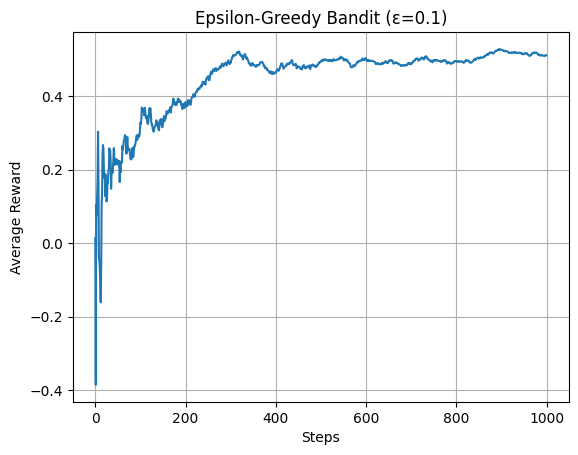

In [15]:
import numpy as np
import matplotlib.pyplot as plt

class EpsilonGreedyBandit:
    def __init__(self, k_arms=10, epsilon=0.1, steps=1000):
        self.k = k_arms
        self.epsilon = epsilon
        self.steps = steps
        self.q_true = np.random.randn(k_arms)  # 各アームの本当の平均報酬
        self.q_est = np.zeros(k_arms)          # 推定される平均報酬
        self.action_count = np.zeros(k_arms)   # 各アームの選択回数
        self.rewards = []

    def select_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.k)
        else:
            return np.argmax(self.q_est)

    def update_estimates(self, action, reward):
        self.action_count[action] += 1
        alpha = 1 / self.action_count[action]
        self.q_est[action] += alpha * (reward - self.q_est[action])

    def run(self):
        for _ in range(self.steps):
            action = self.select_action()
            reward = np.random.randn() + self.q_true[action]  # 確率的な報酬
            self.update_estimates(action, reward)
            self.rewards.append(reward)

        return np.array(self.rewards)

# 実行
bandit = EpsilonGreedyBandit(k_arms=10, epsilon=0.1, steps=1000)
rewards = bandit.run()
plt.plot(np.cumsum(rewards) / (np.arange(1, len(rewards)+1)))
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("Epsilon-Greedy Bandit (ε=0.1)")
plt.grid()
plt.show()
